**MOUNT THE DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**IMPORT LIBRARY AND PACKAGE**

In [2]:
#Sastrawi is text processing library designed to process text dataset in Bahasa indonesia
!pip install sastrawi

import json
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')


     |████████████████████████████████| 215kB 4.9MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**PRE-PROCESSED AND DISPLAY THE DATASET**

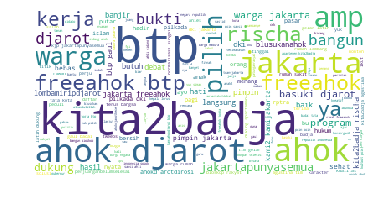

In [3]:
#variable lst is used to store additional stopwords from file stopword_list_TALA.txt
lst = []

#variable keysingkat is used to store the value of column singkat in keynorm.csv
keysingkat = []

#variable keyhasil is used to store the value of column hasil in keynorm.csv
keyhasil = []

#i am using stopwords from nltk library that stop every unnecessary words in Bahasa indonesia
stopwords = nltk.corpus.stopwords.words('indonesian')

#For stemming, i am using stemmer factory from Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

with open('/content/drive/My Drive/Colab Notebooks/Sentiment/data_latih.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)
with open("/content/drive/My Drive/Colab Notebooks/Sentiment/stopword_list_TALA.txt", "r") as ins:
    array = []
    for line in ins:
        array.append(line)
        
#Clean the array from new line character /n
lst = [array.strip() for array in array]
for i in lst:
    stopwords.append(i)


key = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sentiment/key_norm.csv', header = 0)
for w in key['singkat']:
  keysingkat.append(w)
for w in key['hasil']:
  keyhasil.append(w)
  
def clean_tweet(tweet):
  tweet = tweet.lower()
  tweet = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet)
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)
  # Replace @handle with the word USER_MENTION
  #tweet = re.sub(r'@[\S]+', 'USER_MENTION', tweet)
  tweet = re.sub(r'@[^\s]+', 'AT_USER', tweet)
  # Replaces #hashtag with hashtag
  #tweet = re.sub(r'#(\S+)', r' \1 ', tweet)
  tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
  # Remove RT (retweet)
  tweet = re.sub(r'\brt\b', '', tweet)
  tweet = re.sub(r'\buser\b', '', tweet)
  tweet = re.sub(r'\burl\b', '', tweet)
  tweet = tweet.replace("\n","") #hilangin \n atau pake .stripe() /rstripe()
  # Replace 2+ dots with space
  tweet = re.sub(r'\.{2,}', ' ', tweet)
  # Strip space, " and ' from tweet
  tweet = tweet.strip(' "\'')
  # Replace multiple spaces with a single space
  tweet = re.sub(r'\s+', ' ', tweet)
  
  tweet = word_tokenize(tweet)
  for i in range(len(tweet)):
    for j in range(len(keysingkat)):
      if tweet[i] == keysingkat[j]:
        tweet[i] = keyhasil[j]
  
  tweet = [word for word in tweet if word not in stopwords]
  
  stemmedtweet = []
  for w in tweet:
    stemmedtweet.append(stemmer.stem(w))
  return ' '.join(stemmedtweet)

x = df['isi']
y = df['sentimen']
x = x.apply(clean_tweet)

finaltweet = " ".join(tweet for tweet in x)
wordcloud = WordCloud(background_color="white").generate(finaltweet)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**TRANSFORM TEXT INTO NUMERICAL VECTOR USING TDIDF**

In [4]:
#TFIDF stands for Terms Frequency and Inverse-Documet Frequecy, it aims to get the importance score/index of the words in a document. In this project,
#iam using TfidfVectorizer from sklearn, this method return a vector in a certain dimension.
tfidf = TfidfVectorizer(sublinear_tf=True, ngram_range=(1,3))
features = tfidf.fit_transform(x).toarray()
labels = y
features.shape

(650, 6969)

**TEST THE TRASFORMED TEXT USING MULTINOMIAL NAIVE BAYES**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [6]:
print(clf.predict(count_vect.transform(["Ahok pasti juara."])))

['positif']


**CREATE MODEL AND CROSS VALIDATION PARAMETER**

In [7]:
#Implement model using several algorithm, and doing cross validation at 20 fold. It aims to get the best algorithm for this dataset/case
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    KNeighborsClassifier(n_neighbors=1),
    GaussianNB(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    MLPClassifier()
]
CV = 20
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

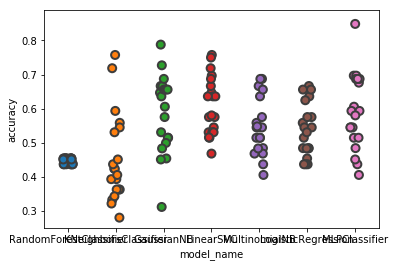

In [8]:
#Plot the result of the cross validation
#sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [9]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GaussianNB                0.586703
KNeighborsClassifier      0.450458
LinearSVC                 0.610250
LogisticRegression        0.539633
MLPClassifier             0.590124
MultinomialNB             0.547452
RandomForestClassifier    0.447618
Name: accuracy, dtype: float64

**DECIDE ON WHAT MODEL WILL BE GOING TO USED**

In [0]:
#Implement the classification using LinearSVC Algorithm
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

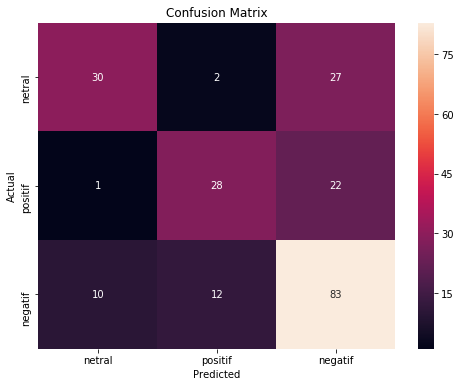

In [11]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sentiment = df['sentimen'].unique()

ax = plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels= sentiment, yticklabels=sentiment)
sns.set(rc={'figure.figsize':(8, 6)})
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

plt.show()

**LINEAR SVC CLASSIFICATION REPORT**

In [12]:
print(metrics.classification_report(y_test, y_pred, target_names=df['sentimen'].unique()))

              precision    recall  f1-score   support

      netral       0.73      0.51      0.60        59
     positif       0.67      0.55      0.60        51
     negatif       0.63      0.79      0.70       105

    accuracy                           0.66       215
   macro avg       0.68      0.62      0.63       215
weighted avg       0.67      0.66      0.65       215

